# **IMAGE CLASSIFICATION USING DEEP LEARNING**

This notebook is an image classifier for identifying a person's mood from imagees


The task is solved by building a Convolutional Neural Network classifier built in Keras/Tensorflow and the Data for this task can be found [here](https://drive.google.com/file/d/1te2_go-7Xu9va0ZP3VDbk1xgSixJK9of/view?usp=sharing). 

Images in the dataset are greyscale and in .PNG format, the images span over 35,000 files and are grouped into; Train, Test, and Validation (in an 80, 10, 10 ratio respectively). 

Each subfolder in the dataset folder has a class of 7 values and are labelled thus:

0 - Angry,
1 - Disgust,
2 - Fear,
3 - Happy,
4 - Sad,
5 - Surprise,
6 - Neutral

**Labelling and Feature extraction on training and testing datasets**

In [1]:
# Label and feature extraction on training datasets

# Label extraction on training dataset

import os

labels = []

for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/0"):
    labels.append(0)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/1"):
    labels.append(1)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/2"):
    labels.append(2)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/3"):
    labels.append(3)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/4"):
    labels.append(4)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/5"):
    labels.append(5)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/train/6"):
    labels.append(6)

#print (labels)


# Feature extraction for training datasets

import cv2

from tqdm import tqdm

TrainPath = [
"../input/facial-expression-dataset-image-folders-fer2013/data/train/0",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/1",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/2",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/3",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/4",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/5",
"../input/facial-expression-dataset-image-folders-fer2013/data/train/6"]

features = []

for i in tqdm(os.listdir(TrainPath[0])):
    features.append(cv2.imread(os.path.join(TrainPath[0],i),0))
for i in tqdm(os.listdir(TrainPath[1])):
    features.append(cv2.imread(os.path.join(TrainPath[1],i),0))
for i in tqdm(os.listdir(TrainPath[2])):
    features.append(cv2.imread(os.path.join(TrainPath[2],i),0))
for i in tqdm(os.listdir(TrainPath[3])):
    features.append(cv2.imread(os.path.join(TrainPath[3],i),0))
for i in tqdm(os.listdir(TrainPath[4])):
    features.append(cv2.imread(os.path.join(TrainPath[4],i),0))
for i in tqdm(os.listdir(TrainPath[5])):
    features.append(cv2.imread(os.path.join(TrainPath[5],i),0))
for i in tqdm(os.listdir(TrainPath[6])):
    features.append(cv2.imread(os.path.join(TrainPath[6],i),0))

100%|██████████| 4965/4965 [00:44<00:00, 111.44it/s]


In [2]:
# Label and feature extraction on testing datasets

# Label extraction on testing dataset

labels_test = []

for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/0"):
    labels_test.append(0)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/1"):
    labels_test.append(1)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/2"):
    labels_test.append(2)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/3"):
    labels_test.append(3)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/4"):
    labels_test.append(4)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/5"):
    labels_test.append(5)
for label in os.listdir("../input/facial-expression-dataset-image-folders-fer2013/data/test/6"):
    labels_test.append(6)

#print (labels_test)

# Feature extraction for testing datasets

TestPath = [
"../input/facial-expression-dataset-image-folders-fer2013/data/test/0",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/1",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/2",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/3",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/4",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/5",
"../input/facial-expression-dataset-image-folders-fer2013/data/test/6"]

test_features = []

for i in tqdm(os.listdir(TestPath[0])):
    test_features.append(cv2.imread(os.path.join(TestPath[0],i),0))
for i in tqdm(os.listdir(TestPath[1])):
    test_features.append(cv2.imread(os.path.join(TestPath[1],i),0))
for i in tqdm(os.listdir(TestPath[2])):
    test_features.append(cv2.imread(os.path.join(TestPath[2],i),0))
for i in tqdm(os.listdir(TestPath[3])):
    test_features.append(cv2.imread(os.path.join(TestPath[3],i),0))
for i in tqdm(os.listdir(TestPath[4])):
    test_features.append(cv2.imread(os.path.join(TestPath[4],i),0))
for i in tqdm(os.listdir(TestPath[5])):
    test_features.append(cv2.imread(os.path.join(TestPath[5],i),0))
for i in tqdm(os.listdir(TestPath[6])):
    test_features.append(cv2.imread(os.path.join(TestPath[6],i),0))

100%|██████████| 626/626 [00:03<00:00, 157.71it/s]


In [11]:
import pandas as pd

train_data = pd.DataFrame()
test_data = pd.DataFrame()

train_data["emotion"] = labels 
train_data["pixel_values"] = features
test_data["emotion"] = labels_test
test_data["pixel_values"] = test_features

train_data.head()

,emotion,pixel_values
0,0,"[[32, 34, 32, 31, 35, 40, 35, 30, 28, 26, 26, ..."
1,0,"[[156, 136, 111, 168, 203, 214, 164, 57, 42, 5..."
2,0,"[[17, 13, 13, 20, 36, 37, 32, 49, 58, 68, 83, ..."
3,0,"[[56, 55, 56, 55, 56, 58, 60, 77, 60, 48, 42, ..."
4,0,"[[54, 57, 57, 55, 57, 61, 60, 57, 57, 58, 56, ..."


In [ ]:
test_data.head()

**Data Visualization**

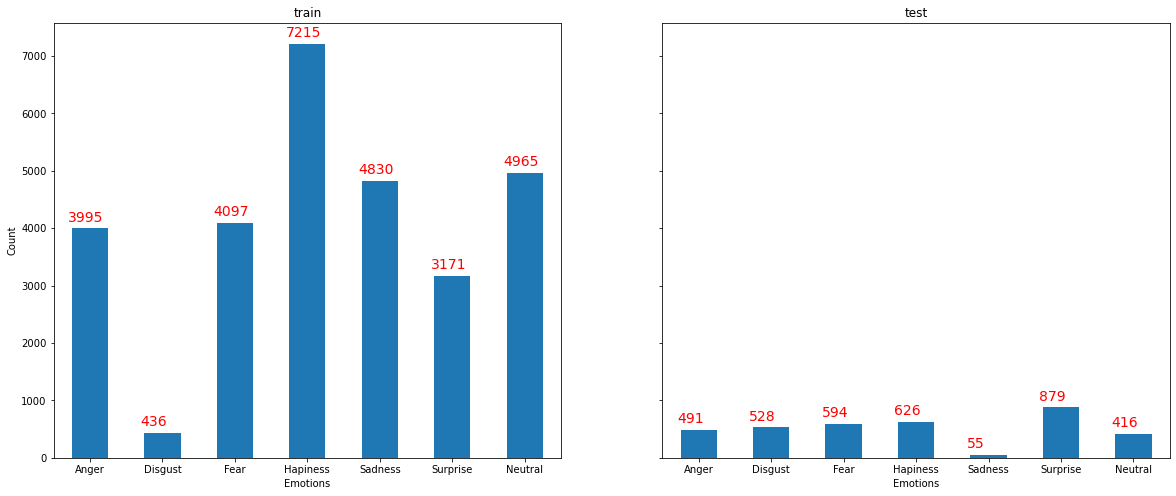

In [12]:
emotion_labels = ["Anger", "Disgust", "Fear", "Hapiness", "Sadness", "Surprise", "Neutral"]

def setup_axe (axe,df,title):
    df ["emotion"].value_counts (sort = False).plot (ax = axe, kind = "bar", rot = 0)
    axe.set_xticklabels (emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str (round ((i.get_height()), 2)), fontsize = 14, color = "red",
                    rotation = 0)

import matplotlib.pyplot as plt   

fig, axes = plt.subplots(1,2, figsize=(20,8), sharey = True)

setup_axe(axes[0],train_data,"train")
setup_axe(axes[1],test_data,"test")

plt.show()

**Standardization of the data**

In [13]:
import numpy as np
from keras.utils import np_utils 

features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

print("Training features shape", features.shape)
print("Training labels shape", labels.shape)
print("Testing features shape", test_features.shape)
print("Testing labels shape", labels_test.shape)

Training features shape (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape (3589, 48, 48, 1)
Testing labels shape (3589, 7)


**Convolutional Nueral Network**

In [51]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score

model = Sequential()

input_shape = (48,48,1)
model.add(Conv2D(64, (6, 6), input_shape = input_shape,activation = "relu", padding = "same"))
model.add(Conv2D(64, (6, 6), activation = "relu", strides = (1,1), padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (6, 6),activation = "relu", strides = (1,1),  padding = "same"))
model.add(Conv2D(128, (6, 6),activation = "relu", strides = (1,1), padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (6, 6),activation = "relu", strides = (1,1), padding = "same"))
model.add(Conv2D(256, (6, 6),activation = "relu", strides = (1,1), padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation("softmax"))
  
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 48, 48, 64)        2368      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 48, 48, 64)        147520    
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 128)       295040    
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 128)       589952    
_________________________________________________________________
batch_normalization_29 (Batc (None, 24, 24, 128)      

In [52]:
from keras.callbacks import EarlyStopping
es = EarlyStopping (monitor = "val_loss", patience = 10, mode = "min", restore_best_weights = True)

In [53]:
history = model.fit(x = features, 
            y = labels, 
            batch_size = 64,
            steps_per_epoch=len(features) / 64,
            epochs = 15, 
            verbose = 1, 
            validation_data = (test_features,labels_test),
            shuffle = True)

Epoch 1/15
449/448 [==============================] - 19s 43ms/step - loss: 1.7759 - accuracy: 0.2984 - val_loss: 1.8320 - val_accuracy: 0.2901
Epoch 2/15
449/448 [==============================] - 19s 42ms/step - loss: 1.4949 - accuracy: 0.4211 - val_loss: 1.4235 - val_accuracy: 0.4505
Epoch 3/15
449/448 [==============================] - 19s 42ms/step - loss: 1.2858 - accuracy: 0.5079 - val_loss: 1.2669 - val_accuracy: 0.5127
Epoch 4/15
449/448 [==============================] - 19s 42ms/step - loss: 1.1288 - accuracy: 0.5723 - val_loss: 1.1533 - val_accuracy: 0.5665
Epoch 5/15
449/448 [==============================] - 19s 42ms/step - loss: 0.9959 - accuracy: 0.6262 - val_loss: 1.1170 - val_accuracy: 0.5854
Epoch 6/15
449/448 [==============================] - 19s 42ms/step - loss: 0.8615 - accuracy: 0.6839 - val_loss: 1.1990 - val_accuracy: 0.5614
Epoch 7/15
449/448 [==============================] - 19s 42ms/step - loss: 0.6736 - accuracy: 0.7526 - val_loss: 1.1705 - val_accuracy:

In [40]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on testing data: 0.5991


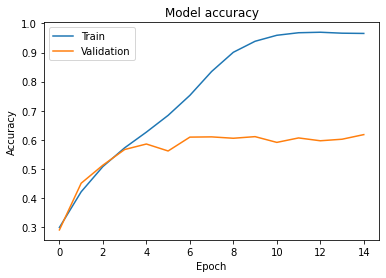

In [54]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy value

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")

plt.show()

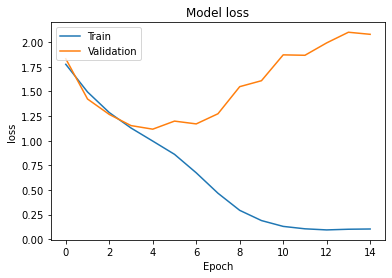

In [55]:
# Plot training & validation loss values

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")

plt.show()

**Evaluation with Confusion Matrix**

In [41]:
from sklearn import metrics

# Predicted values

y_pred = test_pred

# Actual values

y_act = test_true 

# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.

print(metrics.confusion_matrix(y_act, y_pred, labels = [0,1,2,3,4,5,6]))

# Printing the precision and recall, among other metrics

print(metrics.classification_report(y_act, y_pred, labels = [0,1,2,3,4,5,6]))

[[265  10  49  36  63   6  62]
 [  5  38   5   1   3   1   2]
 [ 72  10 207  35  96  48  60]
 [ 32   6  20 692  61  19  49]
 [ 80   7  55  52 281  11 108]
 [ 11   1  33  28  12 314  17]
 [ 64   5  27  56 109  12 353]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       491
           1       0.49      0.69      0.58        55
           2       0.52      0.39      0.45       528
           3       0.77      0.79      0.78       879
           4       0.45      0.47      0.46       594
           5       0.76      0.75      0.76       416
           6       0.54      0.56      0.55       626

    accuracy                           0.60      3589
   macro avg       0.58      0.60      0.58      3589
weighted avg       0.60      0.60      0.60      3589



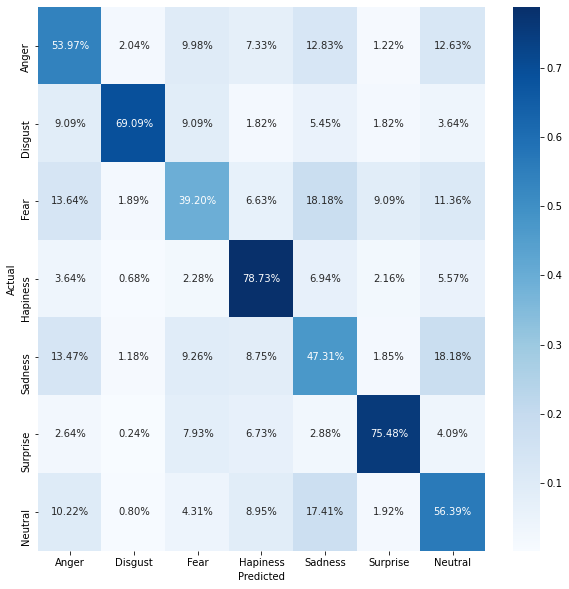

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_act, y_pred)

# Normalise

cmn = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(cmn, annot = True, fmt = ".2%", cmap = "Blues", xticklabels = emotion_labels, yticklabels = emotion_labels)

plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.show(block = False)

In [43]:
classes = ("Anger", "Disgust", "Fear", "Hapiness", "Sadness", "Surprise", "Neutral")

yPosition = np.arange(len(classes))

print(yPosition)

[0 1 2 3 4 5 6]


In [57]:
import matplotlib.pyplot as plt

def emotion_analysis(emotions):
    objects = ["Anger", "Disgust", "Fear", "Hapiness", "Sadness", "Surprise", "Neutral"]
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align = "center", alpha = 0.9)
    plt.tick_params(axis = "x", which = "both", pad = 10,width = 4,length = 10)
    plt.xticks(y_pos, objects)
    plt.ylabel("percentage")
    plt.title("emotion")
    
    plt.show()

**Predictions**

In [47]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

def predict_image(pic):
    img = image.load_img(pic, grayscale = True, target_size = (48, 48))
    show_img = image.load_img(pic, grayscale = False, target_size = (200, 200))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)
    
    color_mode = "grayscale"
    
    emotion_analysis(custom[0])

    x = np.array(x, "float32")
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(show_img)
    plt.show()

    m = 0.000000000000000000001
    a = custom[0]
    
    for i in range(0,len(a)):
        if a[i]>m:
            m = a[i]
            ind = i
        
    print("Expression Prediction:",classes[ind])

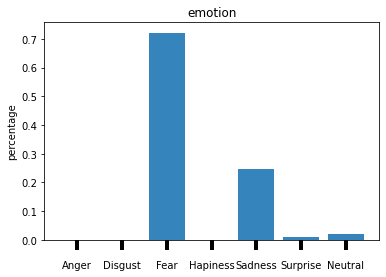

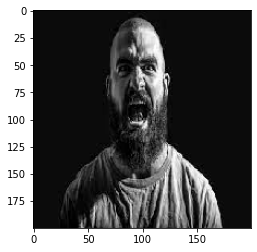

Expression Prediction: Fear


In [58]:
predict_image("../input/angryman11/download.jpeg")

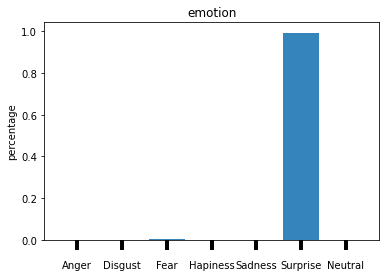

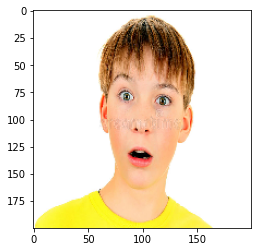

Expression Prediction: Surprise


In [59]:
predict_image("../input/surprised-child/surprised-kid-portrait-isolated-white-background-82608957.jpg")

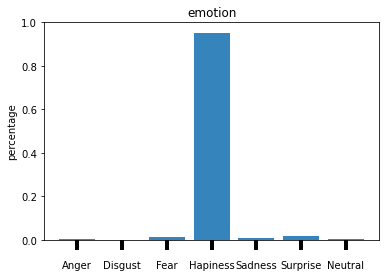

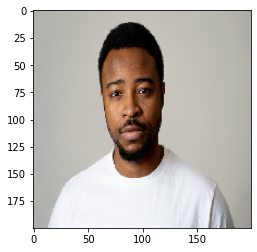

Expression Prediction: Hapiness


In [50]:
predict_image("../input/pokerface1/360_F_246149382_KHkt8Mw8pptlmVuiqmhavvHBC4SEqBu1.jpg")

In [ ]:
# Import pickle Package

import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Image_Classifier.pkl"  

with open(Pkl_Filename, "wb") as file:  
    pickle.dump(model, file)

In [ ]:
"""
# Uncomment this should you need to load the saved model

with open(Pkl_Filename, "rb") as file:  
    Image_Classifier = pickle.load(file)

Image_Classifier

"""